## Homework 4, Problem 3 Classification on simulated data

ECE C143A/C243A, Spring Quarter 2022, Prof. J.C. Kao, TAs T. Monsoor, W. Yu

## Background
We will now apply the results of Problems 1 and 2 to simulated data. The dataset can be found on CCLE as ps4_simdata.mat. 

The following describes the data format. The .mat file has a single variable named 'trial', which is a structure of dimensions (20 data points) × (3 classes). The nth data point for the kth class is denoted via:

`data['trial'][n][k][0]` where n = 0,...,19 and k = 0,1,2 are the data points and classes respectively.  The `[0]` after `[n][k]` is an artifact of how the `.mat` file is imported into Python.  You can get a clearer sense of this below in the plotting scripts.

To make the simulated data as realistic as possible, the data are non-negative integers, so one can think of them as spike counts. With this analogy, there are D = 2 neurons and K = 3 stimulus conditions.

Please follow steps (a)–(e) below for each of the three models. The result of this problem should be three separate plots, one for each model. These plots will be similar in spirit to Figure 4.5 in PRML.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special
import scipy.io as sio
import math

# Load matplotlib images inline
%matplotlib inline

# Reloading any code written in external .py files.
%load_ext autoreload
%autoreload 2

data = sio.loadmat('ps4_simdata.mat') # load the .mat file.
NumData = data['trial'].shape[0]
NumClass = data['trial'].shape[1]

### (a) Plot the data points

Here, to get you oriented on the dataset, we'll give you code that plots the data points.  You do not have to write any new code here, but you should review this code to understand it, since we'll ask you to make plots in later parts of the notebook.

Here, we plot the data points in a two-dimensional space. For classes k = 1, 2, 3, we use a red ×, green +, and blue ∗ for each data point, respectively. The axis limits of the plot are between 0 and 20.  You should use these axes bounds for the rest of the homework.

Text(0, 0.5, 'x_2')

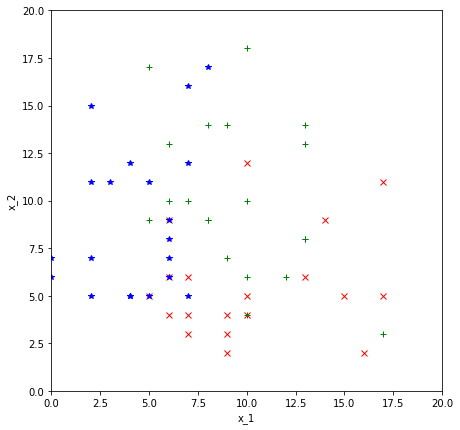

In [2]:
# a
plt.figure(figsize=(7,7))
#====================================================#
# PLOTTING CODE BELOW
#====================================================#
dataArr =  np.zeros((NumClass,NumData ,2)) # dataArr contains the points
for classIX in range(NumClass):
    for dataIX in range(NumData):
        x = data['trial'][dataIX,classIX][0][0][0]
        y = data['trial'][dataIX,classIX][0][1][0]        
        dataArr[classIX,dataIX,0]=x
        dataArr[classIX,dataIX,1]=y
MarkerPat=np.array(['rx','g+','b*'])

for classIX in range(NumClass):
    for dataIX in range(NumData):
        plt.plot(dataArr[classIX,dataIX,0],dataArr[classIX,dataIX,1],MarkerPat[classIX])

#====================================================#
# END PLOTTING CODE
#====================================================# 
plt.axis([0,20,0,20])
plt.xlabel('x_1')
plt.ylabel('x_2')

### (b) (15 points) Find the ML model parameters
Find the ML model parameters, for each model, using results from Problem 1. Report the values of all the ML parameters for each model. (Please print the names and values of all the ML parameters in Jupyter Notebook)

In [3]:
#====================================================#
# YOUR CODE HERE:
#   Find the parameters for each model you derived in problem 1 using
#   the simulated data, and print out the values of each parameter.
#
#   To facilitate plotting later on, we're going to ask you to 
#   format the data in the following way.
#   
#   (1) Keep three dictionaries, modParam1, modParam2, and modParam3
#       which contain the model parameters for model 1 (Gaussian, shared cov),
#       model 2 (Gaussian, class specific cov), and model 3 (Poisson).
#     
#       The Python dictionary is like a MATLAB struct. e.g., you can declare:
#       modParam1 = {} # declares the dictionary
#       modParam1['pi'] = np.array((0.33, 0.33, 0.34)) # sets the field 'pi' to be
#         an np.array of size (3,) containing the class probabilities.
#
#   (2) modParam1 has the following structure
#
#     modParam1['pi'] is an np.array of size (3,) containing the class probabilities.
#     modParam1['mean'] is an np.array of size (3,2) containing the class means.
#     modParam1['cov'] is an np.array of size (2,2) containing the shared cov.
#
#   (3) modParam2: 
#
#     modParam2['pi'] is an np.array of size (3,) containing the class probabilities.
#     modParam2['mean'] is an np.array of size (3,2) containing the class means.
#     modParam2['cov'] is an np.array of size (3,2,2) containing the cov for each of the 3 classes.
#
#   (4) modParam3:
#     modParam2['pi'] is an np.array of size (3,) containing the class probabilities.
#     modParam2['mean'] is an np.array of size (3,2) containing the Poisson parameters for each class.
#
#   These should be consistent with the print statement after this code block.
#
#   HINT: the np.mean and np.cov functions ought simplify the code.
#
#====================================================#

X_rate_m1 = []
Y_rate_m1 = []
for classIX in range(NumClass):
    for dataIX in range(NumData):
        X_rate_m1.append(dataArr[classIX,dataIX,0])
        Y_rate_m1.append(dataArr[classIX,dataIX,1])

######Model 1######
modParam1 = {}
x_class_0_rate = X_rate_m1[0:20]
y_class_0_rate = Y_rate_m1[0:20]
x_class_1_rate = X_rate_m1[20:40]
y_class_1_rate = Y_rate_m1[20:40]
x_class_2_rate = X_rate_m1[40:60]
y_class_2_rate = Y_rate_m1[40:60]

class_0_cov = np.cov(x_class_0_rate, y_class_0_rate)
class_1_cov = np.cov(x_class_1_rate, y_class_1_rate)
class_2_cov = np.cov(x_class_2_rate, y_class_2_rate)

avg_0 = [np.mean(X_rate_m1[0:20]),np.mean(Y_rate_m1[0:20])]
avg_1 = [np.mean(X_rate_m1[20:40]),np.mean(Y_rate_m1[20:40])]
avg_2 = [np.mean(X_rate_m1[40:60]),np.mean(Y_rate_m1[40:60])]

modParam1['pi'] = np.array((1/3, 1/3, 1/3))
modParam1['mean'] = np.array([avg_0 , avg_1, avg_2])
modParam1['cov'] = (class_0_cov + class_1_cov + class_2_cov)/3
#modParam1['cov'] = np.cov(X_rate_m1[0:60], Y_rate_m1[0:60])
####################


#######Model 2 #######
modParam2 = {}
x_class_0_rate = X_rate_m1[0:20]
y_class_0_rate = Y_rate_m1[0:20]
x_class_1_rate = X_rate_m1[20:40]
y_class_1_rate = Y_rate_m1[20:40]
x_class_2_rate = X_rate_m1[40:60]
y_class_2_rate = Y_rate_m1[40:60]

class_0_cov = np.cov(x_class_0_rate, y_class_0_rate)
class_1_cov = np.cov(x_class_1_rate, y_class_1_rate)
class_2_cov = np.cov(x_class_2_rate, y_class_2_rate)

modParam2['pi'] = np.array((1/3, 1/3, 1/3))
modParam2['mean'] = np.array([avg_0 , avg_1, avg_2])
modParam2['cov'] = np.stack((class_0_cov, class_1_cov, class_2_cov))
##############



########Model 3#####
modParam3 = {}
modParam3['pi'] = np.array((1/3, 1/3, 1/3))
modParam3['mean'] = np.array([avg_0 , avg_1, avg_2])
####################


#====================================================#
# END YOUR CODE
#====================================================# 

# Print out the model parameters
print("Model 1:")
print("Class priors:")
print( modParam1['pi'])
print("Means:")
print( modParam1['mean'])
print("Cov:")
print( modParam1['cov'])

print("model 2:")
print("Class priors:")
print( modParam2['pi'])
print("Means:")
print( modParam2['mean'])
print("Cov1:")
print( modParam2['cov'][0])
print("Cov2:")
print( modParam2['cov'][1])
print("Cov3:")
print( modParam2['cov'][2])

print("model 3:")
print("Class priors:")
print( modParam3['pi'])
print("Lambdas:")
print( modParam3['mean'])


Model 1:
Class priors:
[0.33333333 0.33333333 0.33333333]
Means:
[[10.75  5.55]
 [ 9.6  10.1 ]
 [ 4.3   9.  ]]
Cov:
[[12.60964912 -0.0254386 ]
 [-0.0254386  13.17105263]]
model 2:
Class priors:
[0.33333333 0.33333333 0.33333333]
Means:
[[10.75  5.55]
 [ 9.6  10.1 ]
 [ 4.3   9.  ]]
Cov1:
[[22.09210526  2.25      ]
 [ 2.25        7.62894737]]
Cov2:
[[10.04210526 -4.95789474]
 [-4.95789474 16.62105263]]
Cov3:
[[ 5.69473684  2.63157895]
 [ 2.63157895 15.26315789]]
model 3:
Class priors:
[0.33333333 0.33333333 0.33333333]
Lambdas:
[[10.75  5.55]
 [ 9.6  10.1 ]
 [ 4.3   9.  ]]


### (c) Plot the ML mean

The following code plots the ML mean for each class.  You should read the code to understand what is going on.  If you followed our instructions on how to format the data, you should not have to modify any code here.  This plot needs to be generated for us to check if you implemented the means correctly.  You may also use this as a sanity check.

*** If you made modifications in the way the data is formatted, you need to change this code to visualize the ML means*** 

For each class, we plot the ML mean on top of the data using a solid dot of the appropriate color. We set the marker size of this dot to be much larger than the marker sizes you used in part a, so the dot is easy to see.

Text(0, 0.5, 'x_2')

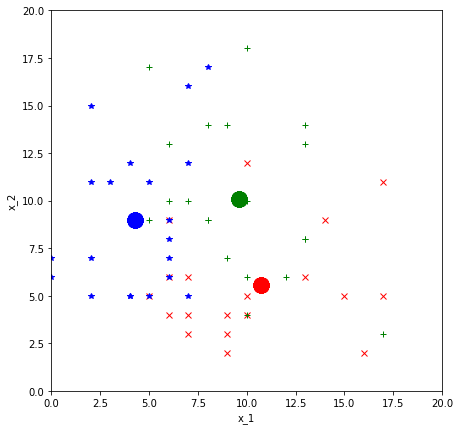

In [4]:
# c
plt.figure(figsize=(7,7))
#====================================================#
# ML MEAN PLOT CODE HERE.
#====================================================#
colors = ['r.','g.','b.']
for classIX in range(NumClass):
    for dataIX in range(NumData):
        plt.plot(dataArr[classIX,dataIX,0],dataArr[classIX,dataIX,1],MarkerPat[classIX])
        plt.plot(modParam1['mean'][classIX,0],modParam1['mean'][classIX,1],colors[classIX],markersize=30)
#====================================================#
# END CODE
#====================================================# 
plt.axis([0,20,0,20])
plt.xlabel('x_1')
plt.ylabel('x_2')

# (d) Plot the ML covariance ellipsoids.

The following code plots the ML covariance for each class.  You should read the code to understand what is going on.  If you followed our instructions on how to format the data, you should not have to modify any code here.  This plot needs to be generated for us to check if you implemented the means correctly.  You may also use this as a sanity check.

*** If you made modifications in the way the data is formatted, you need to change this code to visualize the ML covariance ellipsoids*** 

For each class, we plot the ML covariance using an ellipse of the appropriate color. We plot this on top of the data with the means. This part only encapsulates the Gaussian models i) and ii). We generate separate plots for models i) and ii). 

We use of `plt.contour` can be used to draw an iso-probability contour for each class. To aid interpretation, the contour should be drawn at the same probability level for each class. We call `plt.contour(X, Y, Z, levels = level, colors = color)`. 

For this specific problem, we choose the contour level so you can see each ellipsoid reasonably, e.g. levels = 0.007, where X and Y are obtained via `[X,Y] = np.meshgrid(np.linspace(0, 20, N), np.linspace(0, 20, N))`, where N is the number of partitions, e.g. N = 20. Z is the function value, Please set the contour color to be the same as data points color.

Please understand this code, as it will facilitate the last part of this notebook where we ask you to generate a plot with classification boundaries.  In prior years we asked the students to generate this, but have provided it here to reduce the homework load.

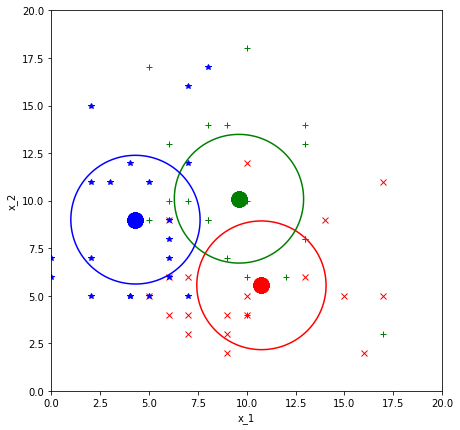

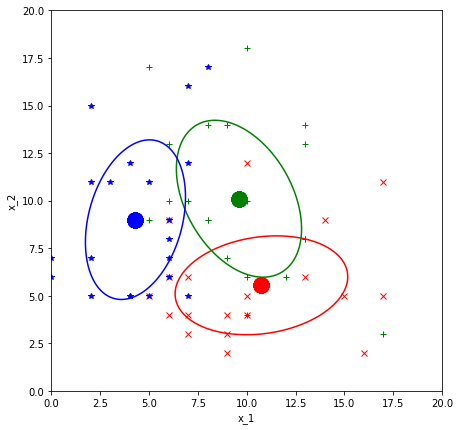

In [5]:
# d
#====================================================#
# ML COV PLOT CODE HERE.
#====================================================#
colors2 = ['r','g','b']
modParam = [modParam1 , modParam2]
for modelIX in range(2):
    plt.figure(modelIX,figsize=(7,7))
    for classIX in range(NumClass):
        for dataIX in range(NumData):
            #plot the points and their means, just like before
            plt.plot(dataArr[classIX,dataIX,0],dataArr[classIX,dataIX,1],MarkerPat[classIX])
            plt.plot(modParam[modelIX]['mean'][classIX,0],modParam[modelIX]['mean'][classIX,1],colors[classIX],markersize=30)
        plt.axis([0,20,0,20])
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        MarkerCol=['r','g','b']
        
    #now begins plotting the elipse
    for classIX in range(NumClass):
        currMean=modParam[modelIX]['mean'][classIX ,:]
        if(modelIX == 0):
            currCov=modParam[modelIX]['cov']
        else:
            currCov=modParam[modelIX]['cov'][classIX]
        xl = np.linspace(0, 20, 201)
        yl = np.linspace(0, 20, 201)
        [X,Y] = np.meshgrid(xl,yl)

        Xlong = np.reshape(X-currMean[0],(np.prod(np.size(X))))
        Ylong = np.reshape(Y-currMean[1],(np.prod(np.size(X))))
        temp = np.row_stack([Xlong,Ylong])
        Zlong = []
        for i in range(np.size(Xlong)):
            Zlong.append(np.matmul(np.matmul(temp[:,i], np.linalg.inv(currCov)), temp[:,i].T))
        Zlong = np.matrix(Zlong)
        Zlong = np.exp(-Zlong/2)/np.sqrt((2*np.pi)*(2*np.pi)*np.linalg.det(currCov))
        Z = np.reshape(Zlong,X.shape)
        isoThr=0.007
        plt.contour(X,Y,Z,1,colors = colors2[classIX])
#====================================================#
# END CODE
#====================================================# 
            


# (e) (15 points) Plot multi-class decision boundaries
Plot multi-class decision boundaries corresponding to the decision rule 
\begin{align}            
    \hat{k }=argmax_{k} \ P(C_{k}|x)
\end{align}
and label each decision region with the appropriate class k. This should be plotted on top of your means and the covariance ellipsoids. Thus, you should start by copying and pasting code from the prior Jupyter Notebook cell.

To plot the multi-class decision boundaries, we recommend that you do it by classifying a dense sampling of the two-dimensional data space.

Hint 1: You can do this by calling `[X,Y] = np.meshgrid(np.linspace(0, 20, N), np.linspace(0, 20, N))` to partition the space as done in the previous section, and then classifying each of these points.  N should be large; in our solution, we use N = 81.  Then at each of these points, draw a dot of the color of the classified class.

Hint 2: You can check that you’ve done this properly by verifying that the decision boundaries pass through the intersection points of the contours drawn in part (d).

Hint 3: It's a good idea to do this one model at a time. You should get things working for model 1 for a smaller `N` value, so in code development, it doesn't take a long time to test your code.  In the final result, your code will probably take some time to run because you're classifying each data point in a dense grid for each model.  

starting
starting


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

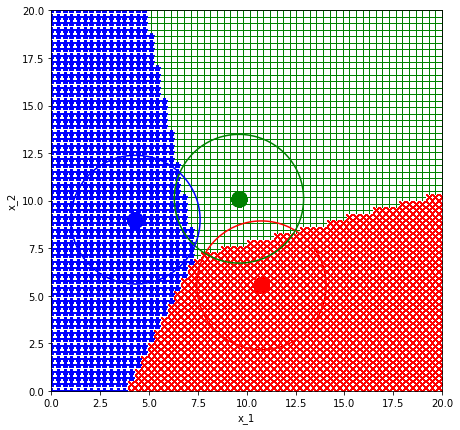

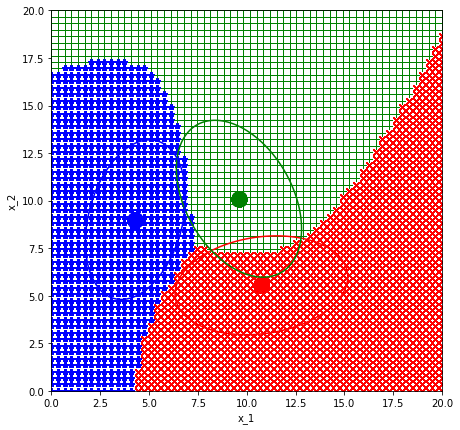

In [22]:
#e
#====================================================#
# YOUR CODE HERE:
#   Plot the data points, their means, covariance ellipsoids,
#     and decision boundaries for each model.
#   Note that the naive Bayes Poisson model does not have an ellipsoid.
#   As in the above description, the decision boundary should be achieved
#     by densely classifying points in a grid.
#====================================================#
N = 60
X = np.linspace(0, 20, N)
Y = np.linspace(0, 20, N)
print("starting")
##############Model 1################
vals = []
for x in X:
    for y in Y:
        Z = np.array([x, y])
        inv_cov = np.linalg.inv(modParam1['cov'])
        
        #Class 0 prob
        diff_mean_0 = Z - modParam1['mean'][0]
        diff_mean_0_t = np.transpose(diff_mean_0)
        prob_class_0 =  -.5 *np.matmul(np.matmul(diff_mean_0_t, inv_cov), diff_mean_0) 
        #Class 1 prob
        diff_mean_1 = Z - modParam1['mean'][1]
        diff_mean_1_t = np.transpose(diff_mean_1)
        prob_class_1 = -.5* np.matmul(np.matmul(diff_mean_1_t,inv_cov) , diff_mean_1)
        #Class 2 prob
        diff_mean_2 = Z - modParam1['mean'][2]
        diff_mean_2_t = np.transpose(diff_mean_2)
        prob_class_2 =  -.5*np.matmul(np.matmul(diff_mean_2_t , inv_cov), diff_mean_2) 

        probs = [prob_class_0, prob_class_1, prob_class_2]
        max_probs = np.max(probs)
        if max_probs == prob_class_0:
            vals.append([x, y, 0])
        elif max_probs == prob_class_1:
            vals.append([x,y, 1])
        elif max_probs == prob_class_2:
            vals.append([x,y, 2])            
            
#for val in vals: 
    #plt.plot(val[0], val[1], MarkerPat[val[2]])
#plt.axis([0,20,0,20])
#plt.xlabel('x_1')
#plt.ylabel('x_2')    
            
#################Model 2###############
vals_2 = []
for x in X:
    for y in Y:
        Z = np.array([x, y])
        
        #Class 0 prob
        inv_cov_0 = np.linalg.inv(modParam2['cov'][0])
        diff_mean_0 = Z - modParam2['mean'][0]
        diff_mean_0_t = np.transpose(diff_mean_0)
        log_det_cov_0 = np.log(np.linalg.det(modParam2['cov'][0]))
        prob_class_0 = -.5 * np.matmul(np.matmul(diff_mean_0_t, inv_cov_0), diff_mean_0) - (.5 *log_det_cov_0)
        #Class 1 prob
        inv_cov_1 = np.linalg.inv(modParam2['cov'][1])
        diff_mean_1 = Z - modParam2['mean'][1]
        diff_mean_1_t = np.transpose(diff_mean_1)
        log_det_cov_1 = np.log(np.linalg.det(modParam2['cov'][1]))
        prob_class_1 = -.5* np.matmul(np.matmul(diff_mean_1_t,inv_cov_1) , diff_mean_1) - (.5 *log_det_cov_1)
        #Class 2 prob
        inv_cov_2 = np.linalg.inv(modParam2['cov'][2])
        diff_mean_2 = Z - modParam2['mean'][2]
        diff_mean_2_t = np.transpose(diff_mean_2)
        log_det_cov_2 = np.log(np.linalg.det(modParam2['cov'][2]))
        prob_class_2 =  -.5*np.matmul(np.matmul(diff_mean_2_t , inv_cov_2), diff_mean_2) - (.5 *log_det_cov_2)

        probs = [prob_class_0, prob_class_1, prob_class_2]
        max_probs = np.max(probs)
        if max_probs == prob_class_0:
            vals_2.append([x, y, 0])
        elif max_probs == prob_class_1:
            vals_2.append([x,y, 1])
        elif max_probs == prob_class_2:
            vals_2.append([x,y, 2])
            
#for val in vals_2: 
    #plt.plot(val[0], val[1], MarkerPat[val[2]])
#plt.axis([0,20,0,20])
#plt.xlabel('x_1')
#plt.ylabel('x_2')   

print('starting')
colors2 = ['r','g','b']
modParam = [modParam1 , modParam2]
for modelIX in range(2):
    plt.figure(modelIX,figsize=(7,7))
    for classIX in range(NumClass):
        for dataIX in range(NumData):
            #plot the points and their means, just like before
            #plt.plot(dataArr[classIX,dataIX,0],dataArr[classIX,dataIX,1],MarkerPat[classIX])
            if (modelIX == 0):
                for val in vals: 
                    plt.plot(val[0], val[1], MarkerPat[val[2]])
            if (modelIX == 1):
                for val in vals_2: 
                    plt.plot(val[0], val[1], MarkerPat[val[2]])
                
            plt.plot(modParam[modelIX]['mean'][classIX,0],modParam[modelIX]['mean'][classIX,1],colors[classIX],markersize=30)
        plt.axis([0,20,0,20])
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        MarkerCol=['r','g','b']
        
    #now begins plotting the elipse
    for classIX in range(NumClass):
        currMean=modParam[modelIX]['mean'][classIX ,:]
        if(modelIX == 0):
            currCov=modParam[modelIX]['cov']
        else:
            currCov=modParam[modelIX]['cov'][classIX]
        xl = np.linspace(0, 20, 201)
        yl = np.linspace(0, 20, 201)
        [X,Y] = np.meshgrid(xl,yl)

        Xlong = np.reshape(X-currMean[0],(np.prod(np.size(X))))
        Ylong = np.reshape(Y-currMean[1],(np.prod(np.size(X))))
        temp = np.row_stack([Xlong,Ylong])
        Zlong = []
        for i in range(np.size(Xlong)):
            Zlong.append(np.matmul(np.matmul(temp[:,i], np.linalg.inv(currCov)), temp[:,i].T))
        Zlong = np.matrix(Zlong)
        Zlong = np.exp(-Zlong/2)/np.sqrt((2*np.pi)*(2*np.pi)*np.linalg.det(currCov))
        Z = np.reshape(Zlong,X.shape)
        isoThr=0.007
        plt.contour(X,Y,Z,1,colors = colors2[classIX])


#Model 3
vals_3 = []
for x in X:
    for y in Y:
        #Z = np.array([x, y])
        
        #Class0 prob
        lamda_x0 = modParam3['mean'][0][0]
        lamda_y0 = modParam3['mean'][0][1]
        sum_x0 = x * np.log(lamda_x0) - lamda_x0
        sum_y0 = y * np.log(lamda_y0) - lamda_y0
        prob0 = sum_x0 + sum_y0
        
        #Class1 prob
        lamda_x1 = modParam3['mean'][1][0]
        lamda_y1 = modParam3['mean'][1][1]
        sum_x1 = x * np.log(lamda_x1) - lamda_x1
        sum_y1 = y * np.log(lamda_y1) - lamda_y1
        prob1 = sum_x1 + sum_y1
        
        #Class2 prob
        lamda_x2 = modParam3['mean'][2][0]
        lamda_y2 = modParam3['mean'][2][1]
        sum_x2 = x * np.log(lamda_x2) - lamda_x2
        sum_y2 = y * np.log(lamda_y2) - lamda_y2
        prob2 = sum_x2 + sum_y2
         
        probs = [prob0, prob1, prob2]
        max_probs = np.max(probs)
        classification = probs.index(max_probs)
        vals_3.append([x,y, classification])
for val in vals_3: 
    plt.plot(val[0], val[1], MarkerPat[val[2]])
plt.axis([0,20,0,20])
plt.xlabel('x_1')
plt.ylabel('x_2')           

print("done")

    

Text(0.5, 1.0, 'Model 3')

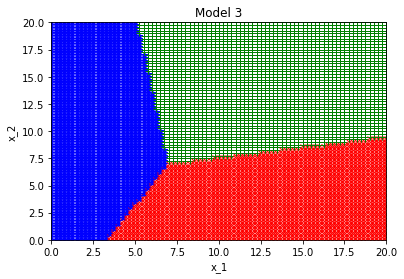

In [20]:
#Model 3
vals_3 = []
N = 81
X = np.linspace(0, 20, N)
Y = np.linspace(0, 20, N)
for x in X:
    for y in Y:
        
        #Class0 prob
        lamda_x0 = modParam3['mean'][0][0]
        lamda_y0 = modParam3['mean'][0][1]
        sum_x0 = x * np.log(lamda_x0) - lamda_x0
        sum_y0 = y * np.log(lamda_y0) - lamda_y0
        prob0 = sum_x0 + sum_y0
        
        #Class1 prob
        lamda_x1 = modParam3['mean'][1][0]
        lamda_y1 = modParam3['mean'][1][1]
        sum_x1 = x * np.log(lamda_x1) - lamda_x1
        sum_y1 = y * np.log(lamda_y1) - lamda_y1
        prob1 = sum_x1 + sum_y1
        
        #Class2 prob
        lamda_x2 = modParam3['mean'][2][0]
        lamda_y2 = modParam3['mean'][2][1]
        sum_x2 = x * np.log(lamda_x2) - lamda_x2
        sum_y2 = y * np.log(lamda_y2) - lamda_y2
        prob2 = sum_x2 + sum_y2
         
        probs = [prob0, prob1, prob2]
        
        max_probs = np.max(probs)
        classification = probs.index(max_probs)
        vals_3.append([x,y, classification])
for val in vals_3: 
    plt.plot(val[0], val[1], MarkerPat[val[2]])
plt.axis([0,20,0,20])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Model 3')

#====================================================#
# END YOUR CODE
#====================================================# 